<a href="https://colab.research.google.com/github/spencer18001/machine-learning-zoomcamp/blob/main/02/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!wget -O data.csv https://github.com/spencer18001/machine-learning-zoomcamp/blob/main/02/data.csv?raw=1

## 2. Machine Learning for Regression


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2.2 Data preparation

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [6]:
df.dtypes

,0
make,object
model,object
year,int64
engine_fuel_type,object
engine_hp,float64
engine_cylinders,float64
transmission_type,object
driven_wheels,object
number_of_doors,float64
market_category,object


In [7]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [8]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [9]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## 2.3 Exploratory data analysis

In [10]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

Distribution of price

<Axes: xlabel='msrp', ylabel='Count'>

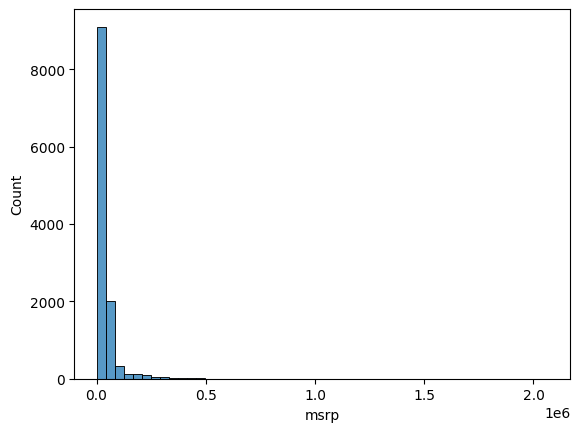

In [11]:
sns.histplot(df.msrp, bins=50)
# these long tail distributions are very common for prices
# because there are most of the things are cheap like for general public but there are a few super expensive ones
# this tail will confuse our model so it will really screw things # todo_spencer

<Axes: xlabel='msrp', ylabel='Count'>

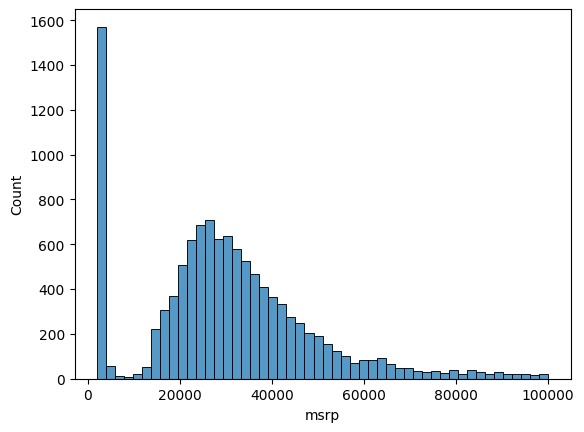

In [12]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50) # zoom in

In [13]:
np.log1p([0, 1, 10, 1000, 100000])
# here we go like from 10 to 1000 but the increase between the logarithm of them is not that high
# so it kind of brings very high values and makes them lower

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [14]:
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

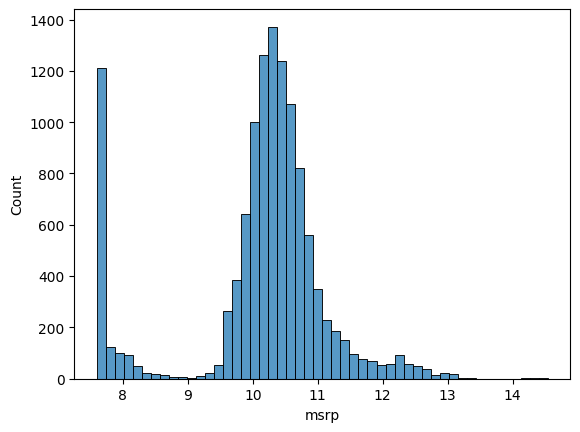

In [15]:
sns.histplot(price_logs, bins=50)
# approximate the target variables to normal distribution

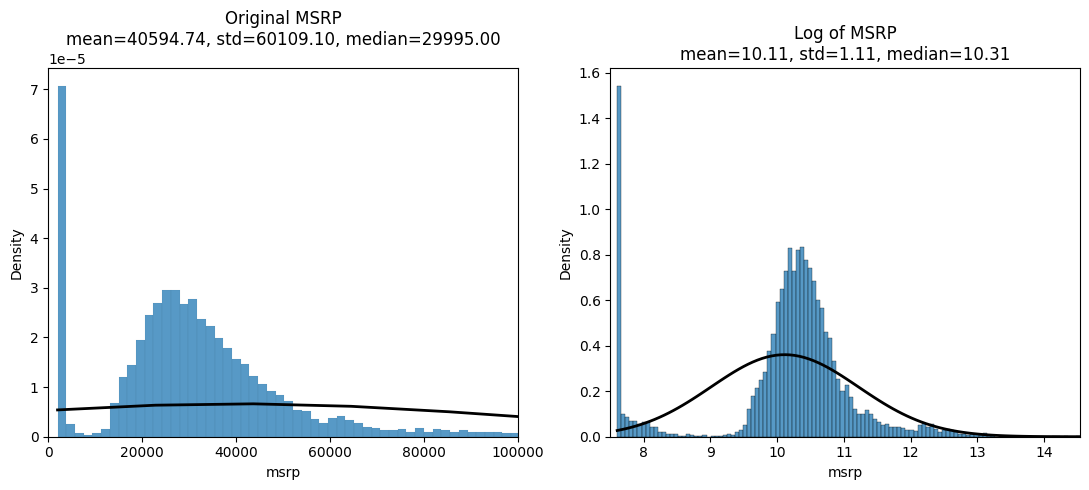

In [16]:
from scipy.stats import norm

def plot_hist_with_normal(ax, df_msrp, xlim=None, title_prefix=''):
    # 繪製直方圖和密度曲線
    sns.histplot(df_msrp, stat="density", ax=ax)

    # 計算正態分佈參數
    mean_msrp = df_msrp.mean()
    std_msrp = df_msrp.std()
    xmin, xmax = df_msrp.min(), df_msrp.max()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean_msrp, std_msrp)

    # 繪製正態分佈曲線
    ax.plot(x, p, 'k', linewidth=2)

    # 設定 x 軸範圍
    if xlim:
        ax.set_xlim(xlim)

    ax.set_title(f'{title_prefix}\nmean={mean_msrp:.2f}, std={std_msrp:.2f}, median={df_msrp.median():.2f}')

# 創建一個圖形和兩個子圖
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

# 在第一個子圖上繪製原始 df.msrp 圖表
plot_hist_with_normal(axes[0], df.msrp, xlim=(0, 100000), title_prefix='Original MSRP')

# 在第二個子圖上繪製 log_price 圖表
plot_hist_with_normal(axes[1], price_logs, xlim=(7.5, price_logs.max()), title_prefix='Log of MSRP')

plt.tight_layout()
plt.show()

Missing values

In [17]:
df.isnull().sum()

,0
make,0
model,0
year,0
engine_fuel_type,3
engine_hp,69
engine_cylinders,30
transmission_type,0
driven_wheels,0
number_of_doors,6
market_category,3742


## 2.4 Setting up the validation framework

In [18]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n, n_train, n_val, n_test

(11914, 7150, 2382, 2382)

In [19]:
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

In [20]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [23]:
y_train_raw = df_train.msrp.values

In [24]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## 2.5 Linear regression

In [25]:
def linear_regression(xi, w0, w):
    n = len(xi)

    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

In [26]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]
linear_regression(xi, w0, w)

12.312

In [27]:
np.expm1(12.312)

222347.2221101062

## 2.6 Linear regression vector form

In [28]:
def dot(xi, w):
    n = len(xi)

    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]
    return res

In [29]:
def linear_regression(xi, w0, w): # 寫成內積型式
    return w0 + dot(xi, w)

In [30]:
linear_regression(xi, w0, w)

12.312000000000001

In [31]:
def linear_regression(xi, w0, w): # 將 bias 併入向量
    xi = [1] + xi
    w_new = [w0] + w
    return dot(xi, w_new)

In [32]:
linear_regression(xi, w0, w)

12.312

$
\begin{bmatrix}
  1 & x_{11} & \cdots & x_{1n} \\
  \vdots & \vdots & \ddots & \vdots \\
  1 & x_{m1} & \cdots & x_{mn}
\end{bmatrix}
\begin{bmatrix}
  w_{0} \\
  \vdots \\
  w_{n}
\end{bmatrix}=
\begin{bmatrix}
  y_{0} \\
  \vdots \\
  y_{n}
\end{bmatrix}
$

In [33]:
def linear_regression(X, w): # 寫成矩陣型式
    return X.dot(w)

In [34]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [35]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [36]:
linear_regression(X, w_new)

array([12.38 , 13.552, 12.312])

## 2.7 Training a linear regression model

In [37]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y) # normal equation
    # 也可直接求解, 就沒有可逆的問題
    # w_full = np.linalg.solve(XTX, X.T.dot(y))
    return w_full[0], w_full[1:]

In [38]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

train_linear_regression(X, y)

(25844.754055766753, array([ -16.08906468, -199.47254894,   -1.22802883]))

## 2.8 Car price baseline model

In [39]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [40]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

w0, w

(7.927257388069986,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

<Axes: ylabel='Count'>

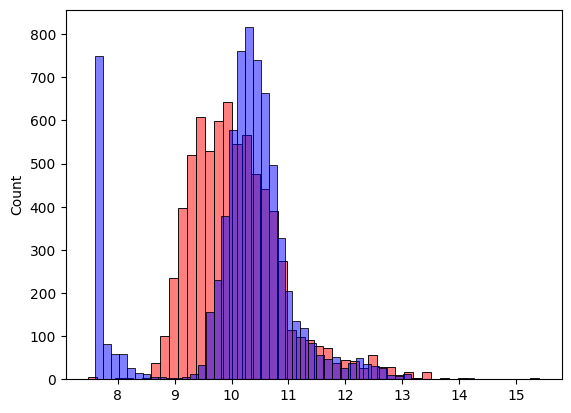

In [41]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## 2.9 RMSE

In [42]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [43]:
rmse(y_train, y_pred)

0.7554192603920132

## 2.10 Validating the model

In [44]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [45]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.761653099130156

## 2.11 Simple feature engineering

In [46]:
def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df['year']
    features = base + ['age'] # 加入 age

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [47]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.5172055461058299

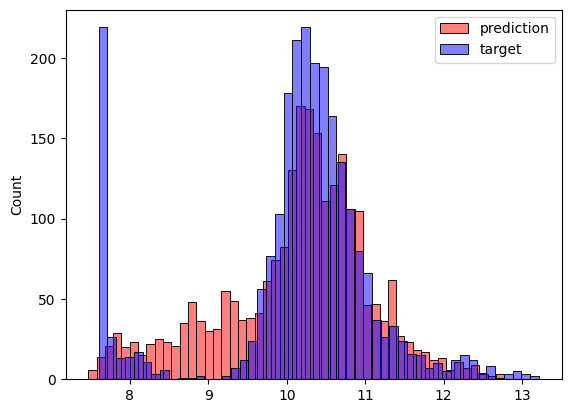

In [48]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

## 2.12 Categorical variables

In [49]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']
# driven_wheels 分五欄, 但 rank 只有 4; linearly dependent

categorical = {}
for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [50]:
def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [51]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

82.83777025916584

In [52]:
w0, w

(-932835875671329.5,
 array([-3.62144497e-01, -1.06659522e+01, -6.39894984e+00, -6.15464536e+00,
         1.52974723e-03, -3.97906457e+00, -7.89268478e+03, -7.92282753e+03,
        -7.89101964e+03,  1.04586070e+00, -2.31941244e+01, -1.26680582e+01,
        -4.11860790e+01, -1.23261318e+01, -3.97391208e+00,  8.87219454e+00,
         6.60591192e+00, -1.56575790e+01,  3.43239069e+02, -1.68728767e+02,
        -1.43523369e+02, -1.58367750e+02, -1.78062292e+02, -2.38233427e+02,
         9.32835876e+14,  9.32835876e+14,  9.32835876e+14,  9.32835876e+14,
        -2.94149220e-01, -3.00185009e+00,  2.81964860e+00,  1.31754126e+01,
         5.66683406e+00,  1.09112994e+02,  8.78342987e+01,  1.21890942e+02,
        -1.44115660e-01, -2.62579827e-02,  1.75913981e-01,  3.65037816e-01,
        -2.90235596e-01]))

In [53]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    rank = np.linalg.matrix_rank(X)
    print(f"shape: {X.shape}")
    print(f"rank: {rank}")
    print(f"X: {X}\n")

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y) # normal equation
    # 也可直接求解, 就沒有可逆的問題
    # w_full = np.linalg.solve(XTX, X.T.dot(y))
    return w_full[0], w_full[1:]

In [54]:
def prepare_X_debug(df, col):
    df = df.copy()

    features = []

    for value in list(df_train[col].value_counts().head().index):
        new_col = '%s_%s' % (col, value)
        df[new_col] = (df[col] == value).astype(int)
        features.append(new_col)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    rank = np.linalg.matrix_rank(X)
    return X

In [55]:
col = 'driven_wheels'
X_train = prepare_X_debug(df_train, col)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_debug(df_val, col)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)
# 由於 X 新增了 [1...1].T 到第 1 行,
# 感覺 one-hot encoding 若沒有 [0...0] 的特徵 (有 missing value, 或 value_counts() > 5 個的都會有 [0...0] 的特徵),
# X 的 rank 就會 < n, 而造成不可逆

shape: (7150, 5)
rank: 4
X: [[1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0.]
 ...
 [1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0.]]



26.41699545188256

## 2.13 Regularization

In [56]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.0000001],
]

X = np.array(X)
X

array([[4.       , 4.       , 4.       ],
       [3.       , 5.       , 5.       ],
       [5.       , 1.       , 1.       ],
       [5.       , 4.       , 4.       ],
       [7.       , 5.       , 5.       ],
       [4.       , 5.       , 5.0000001]])

In [57]:
y= [1, 2, 3, 1, 2, 3]

In [58]:
XTX = X.T.dot(X)
XTX

array([[140.       , 111.       , 111.0000004],
       [111.       , 108.       , 108.0000005],
       [111.0000004, 108.0000005, 108.000001 ]])

In [59]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.92646538e-02, -1.54615164e+05,  1.54615121e+05],
       [-1.54615170e+05,  3.51843724e+13, -3.51843721e+13],
       [ 1.54615129e+05, -3.51843721e+13,  3.51843718e+13]])

In [60]:
XTX_inv.dot(X.T).dot(y)

array([ 2.73776578e-01, -4.41093100e+06,  4.41093113e+06])

In [61]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]
XTX = np.array(XTX)

In [62]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [63]:
XTX = XTX + 0.01 * np.eye(3)

In [64]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [65]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [82]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print((y_pred<0).sum())
rmse(y_val, y_pred)

0


0.4608208286385144

In [87]:
# 看看 label 不取 log 的訓練效果
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train_raw, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print((y_pred<0).sum()) # 不做 log1p normalize 確實有點問題 # todo_spencer
rmse(y_val, np.log1p(y_pred))

242


<ipython-input-87-be76ddf65f3a>:8: RuntimeWarning: invalid value encountered in log1p
  rmse(y_val, np.log1p(y_pred))


nan

## 2.14 Tuning the model

In [68]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r, w0, score)

0.0 -932835875671329.5 82.83777025916584
1e-05 8.09618142888737 0.46081530426411305
0.0001 7.1303586046951 0.4608153652024511
0.001 7.13087408161861 0.46081585844175094
0.1 7.000232420058528 0.4608736549089936
1 6.250747847004844 0.46158128382759855
10 4.729512585675707 0.472609877267077


In [69]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.46081585844175094

## 2.15 Using the model

In [70]:
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)

In [71]:
X_full_train = prepare_X(df_full_train)
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [72]:
y_full_train = np.concatenate([y_train, y_val])

In [73]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [74]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.4600753969691607

In [75]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [76]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [77]:
X_small = prepare_X(df_small)

y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.632492518147435

In [78]:
np.expm1(y_pred), np.expm1(y_test[20])

(41459.33716062769, 35000.00000000001)

## 2.16 Next steps

* We included only 5 top features. What happens if we include 10?

Other projects

* Predict the price of a house - e.g. boston dataset
* https://archive.ics.uci.edu/ml/datasets.php?task=reg
* https://archive.ics.uci.edu/ml/datasets/Student+Performance

## 2.17 Summary

* EDA - looking at data, finding missing values
* Target variable distribution - long tail => bell shaped curve
* Validation framework: train/val/test split (helped us detect problems)
* Normal equation - not magic, but math
* Implemented it with numpy
* RMSE to validate our model
* Feature engineering: age, categorical features
* Regularization to fight numerical instability